In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Exercice 14: équation de la chaleur

${\large \frac{\partial u}{\partial t}= \frac{\partial^2 u}{\partial x^2}}$ pour $0<x<1$

CF: $u(0,t)=u(1,t)=0$

CI: $g(x)= \begin{cases}
 1  \quad a \leq x \leq b \\
 0  \quad \mbox{sinon} \end{cases}$

In [3]:
def square_Init(x,x1,x2,yy):
    y=np.zeros(np.size(x))
    for i in range(np.size(x)):
        if x[i]>x1 and x[i]<x2:
            y[i]=yy
    return(y)

def tridiag(a,b,c,f):
    N=f.size
    x=np.zeros(N)
    cstar=np.zeros(N)
    astar=a[0]
    x[0]=f[0]/astar
    for k in range(1,N):
        cstar[k-1]=c[k-1]/astar
        astar=a[k]-b[k]*cstar[k-1]
        x[k]=(f[k]-b[k]*x[k-1])/astar
    for k in range(N-2,-1,-1):
        x[k]-=cstar[k]*x[k+1]
    return(x)


def EulAvant(U0,x,tmax,lmb,bc):
    h=x[1]-x[0]
    k=lmb*h**2
    M=int(np.round(tmax/k))+1
    t=np.linspace(0.,tmax,M)
    k=tmax/(M-1)
    lmb=k/h**(2)
    U=np.zeros((N+2,np.shape(t)[0]))
    U[:,0]=U0
    A=np.diagflat(lmb*np.ones(N-1),-1)+np.diagflat(-(2*lmb)*np.ones(N))+np.diagflat(+lmb*np.ones(N-1),1)
    for i in range(np.shape(t)[0]-1):
        Uc = U[1:-1,i]
        U[1:-1,i+1]=Uc+A@Uc
        U[0,i+1]=bc[0]
        U[-1,i+1]=bc[1]
    return(U,lmb,t)

def EulArriere(U0,x,tmax,lmb,bc):
    N=np.shape(x)[0]-2
    h=x[1]-x[0]
    k=lmb*h**2
    M=int(np.round(tmax/k))+1
    t=np.linspace(0.,tmax,M)
    k=t[1]-t[0]
    lmb=k/h**(2)
    U=np.zeros((N+2,np.shape(t)[0]))
    U[:,0]=U0
    a=(1+2*lmb)*np.ones(N)
    b=-lmb*np.ones(N)
    c=-lmb*np.ones(N)
    for i in range(np.shape(t)[0]-1):
        Uc = U[1:-1,i]
        U[1:-1,i+1]=tridiag(a,b,c,Uc)
        U[0,i+1]=bc[0]
        U[-1,i+1]=bc[1]
    return(U,lmb,t)

def CrNich(U0,x,tmax,lmb,bc):
    N=np.shape(x)[0]-2
    h=x[1]-x[0]
    k=lmb*h**2
    M=int(np.round(tmax/k))+1
    t=np.linspace(0.,tmax,M)
    k=t[1]-t[0]
    lmb=k/h**(2)
    U=np.zeros((N+2,np.shape(t)[0]))
    U[:,0]=U0
    B_u=np.diagflat(-lmb*np.ones(N-1),-1)+np.diagflat(-2*(1-lmb)*np.ones(N))+np.diagflat(-lmb*np.ones(N-1),1)
    a=-2*(1+lmb)*np.ones(N)
    b=lmb*np.ones(N)
    c=lmb*np.ones(N)
    for i in range(np.shape(t)[0]-1):
        Uc = U[1:-1,i]
        U[1:-1,i+1]=tridiag(a,b,c,B_u.dot(Uc))
        U[0,i+1]=bc[0]
        U[-1,i+1]=bc[1]
    return(U,lmb,t)

In [4]:
#Paramètres d'intégration numérique
N=12
x=np.linspace(0.,1.,N+2)
tmax=0.1
#Conditions frontières
bc=[0,0]
#Conditions initiales
a=1./4.
b=3./4.
U0_carre=square_Init(x,a,b,1)
U0_sinus=np.sin(2*np.pi*x)
lmb=0.4

EAv_carre=EulAvant(U0_carre,x,tmax,lmb,bc)
EAr_carre=EulArriere(U0_carre,x,tmax,lmb,bc)
CN_carre=CrNich(U0_carre,x,tmax,lmb,bc)

EAv_sinus=EulAvant(U0_sinus,x,tmax,lmb,bc)
EAr_sinus=EulArriere(U0_sinus,x,tmax,lmb,bc)
CN_sinus=CrNich(U0_sinus,x,tmax,lmb,bc)


In [5]:
#Solution analytique pour condition initiale carré et sinusoidal
t=EAv_carre[2]
xsol=np.linspace(0,1,100)
#xsol=x
Sol_carre=np.zeros((np.shape(xsol)[0],np.shape(t)[0]))
Sol_sinus=np.zeros((np.shape(xsol)[0],np.shape(t)[0]))
for i in range(np.shape(t)[0]):
    for p in range(1,1001):
        lambdap=float(p)*np.pi
        Ap=(2./(lambdap))*(np.cos(lambdap*a)-np.cos(lambdap*b))
        Sol_carre[:,i]+=Ap*np.exp(-lambdap**2*t[i])*np.sin(lambdap*xsol)
        Sol_sinus[:,i]=np.sin(2*np.pi*xsol)*np.exp(-(2*np.pi)**2*t[i])



0.3355543118817334
0.4023809523809524
[0.         0.00238095 0.0047619  0.00714286 0.00952381 0.01190476
 0.01428571 0.01666667 0.01904762 0.02142857 0.02380952 0.02619048
 0.02857143 0.03095238 0.03333333 0.03571429 0.03809524 0.04047619
 0.04285714 0.0452381  0.04761905 0.05       0.05238095 0.0547619
 0.05714286 0.05952381 0.06190476 0.06428571 0.06666667 0.06904762
 0.07142857 0.07380952 0.07619048 0.07857143 0.08095238 0.08333333
 0.08571429 0.08809524 0.09047619 0.09285714 0.0952381  0.09761905
 0.1       ]


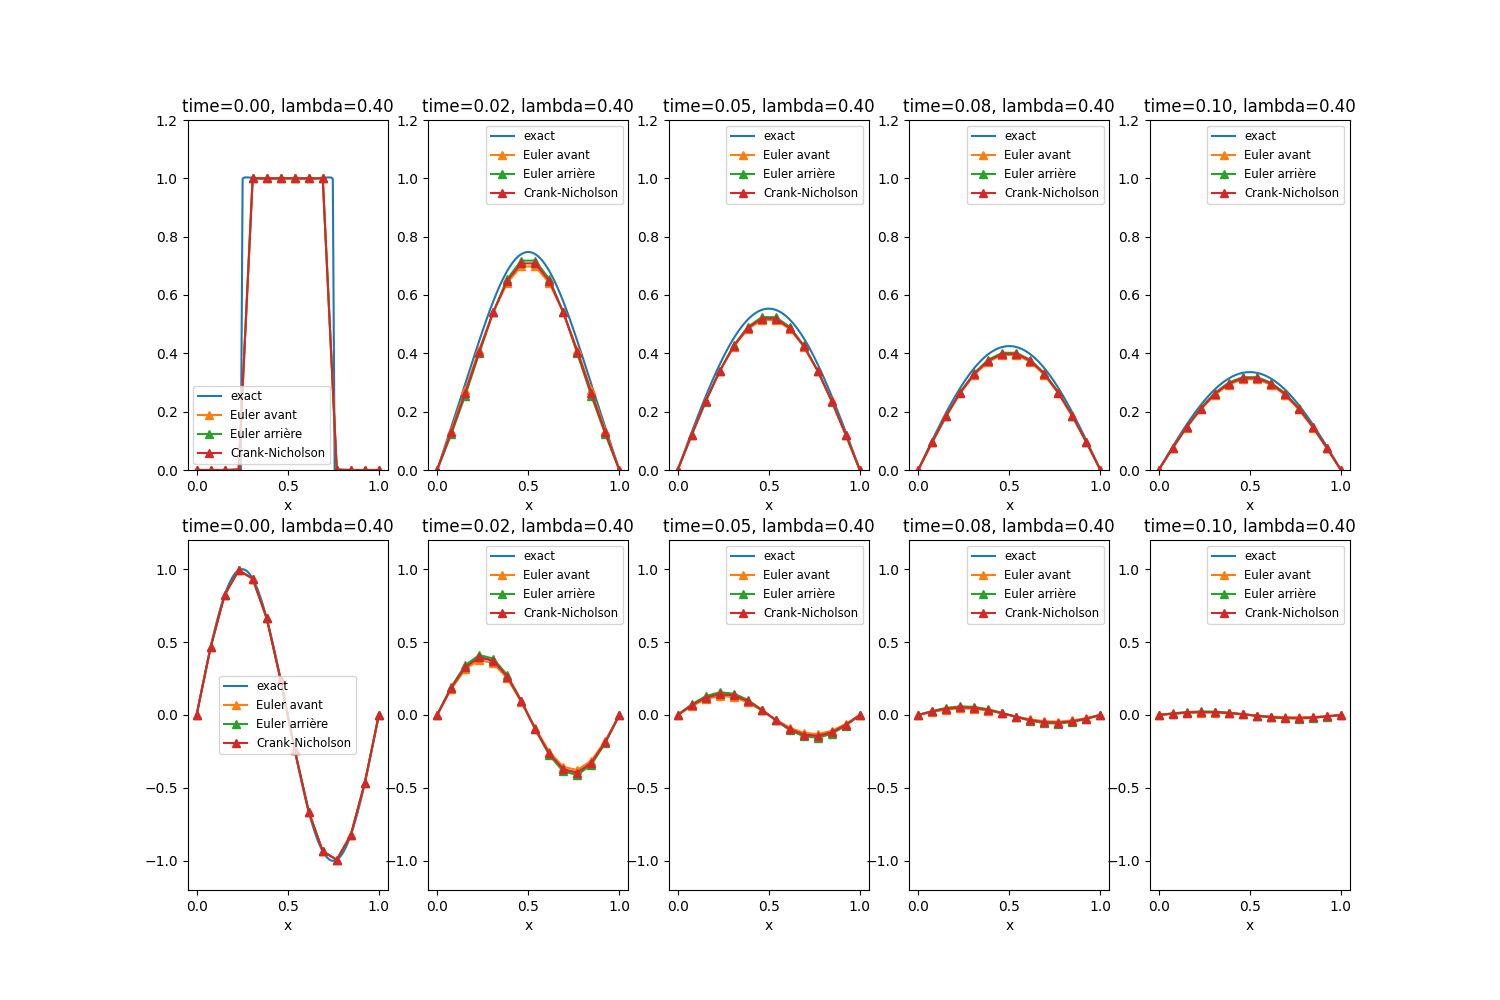

In [6]:
print(np.max(Sol_carre[:,-1]))
print(EAv_carre[1])
print(t)
M=t.shape[0]
Mspan=[0,0.25,0.5,0.75,0.9999999]
fig,ax=plt.subplots(2,5,figsize=(15,10))
for i in range(len(Mspan)):
    n=int(np.floor(M*Mspan[i]))
    ax[0,i].plot(xsol,Sol_carre[:,n],label='exact')
    ax[0,i].plot(x,EAv_carre[0][:,n],label='Euler avant',marker='^')
    ax[0,i].plot(x,EAr_carre[0][:,n],label='Euler arrière',marker='^')
    ax[0,i].plot(x,CN_carre[0][:,n],label='Crank-Nicholson',marker='^')
    ax[0,i].legend(loc='best',fontsize='small')
    ax[0,i].set_xlabel('x')
    #ax[i].set_ylabel('u')
    ax[0,i].set_ylim((0.,1.2))
    ax[0,i].set_title('time=%.2f, lambda=%.2f'%(EAv_carre[2][n],EAv_carre[1]))
    ax[1,i].plot(xsol,Sol_sinus[:,n],label='exact')
    ax[1,i].plot(x,EAv_sinus[0][:,n],label='Euler avant',marker='^')
    ax[1,i].plot(x,EAr_sinus[0][:,n],label='Euler arrière',marker='^')
    ax[1,i].plot(x,CN_sinus[0][:,n],label='Crank-Nicholson',marker='^')
    ax[1,i].legend(loc='best',fontsize='small')
    ax[1,i].set_xlabel('x')
    #ax[i].set_ylabel('u')
    ax[1,i].set_ylim((-1.2,1.2))
    ax[1,i].set_title('time=%.2f, lambda=%.2f'%(EAv_sinus[2][n],EAv_sinus[1]))
plt.show()

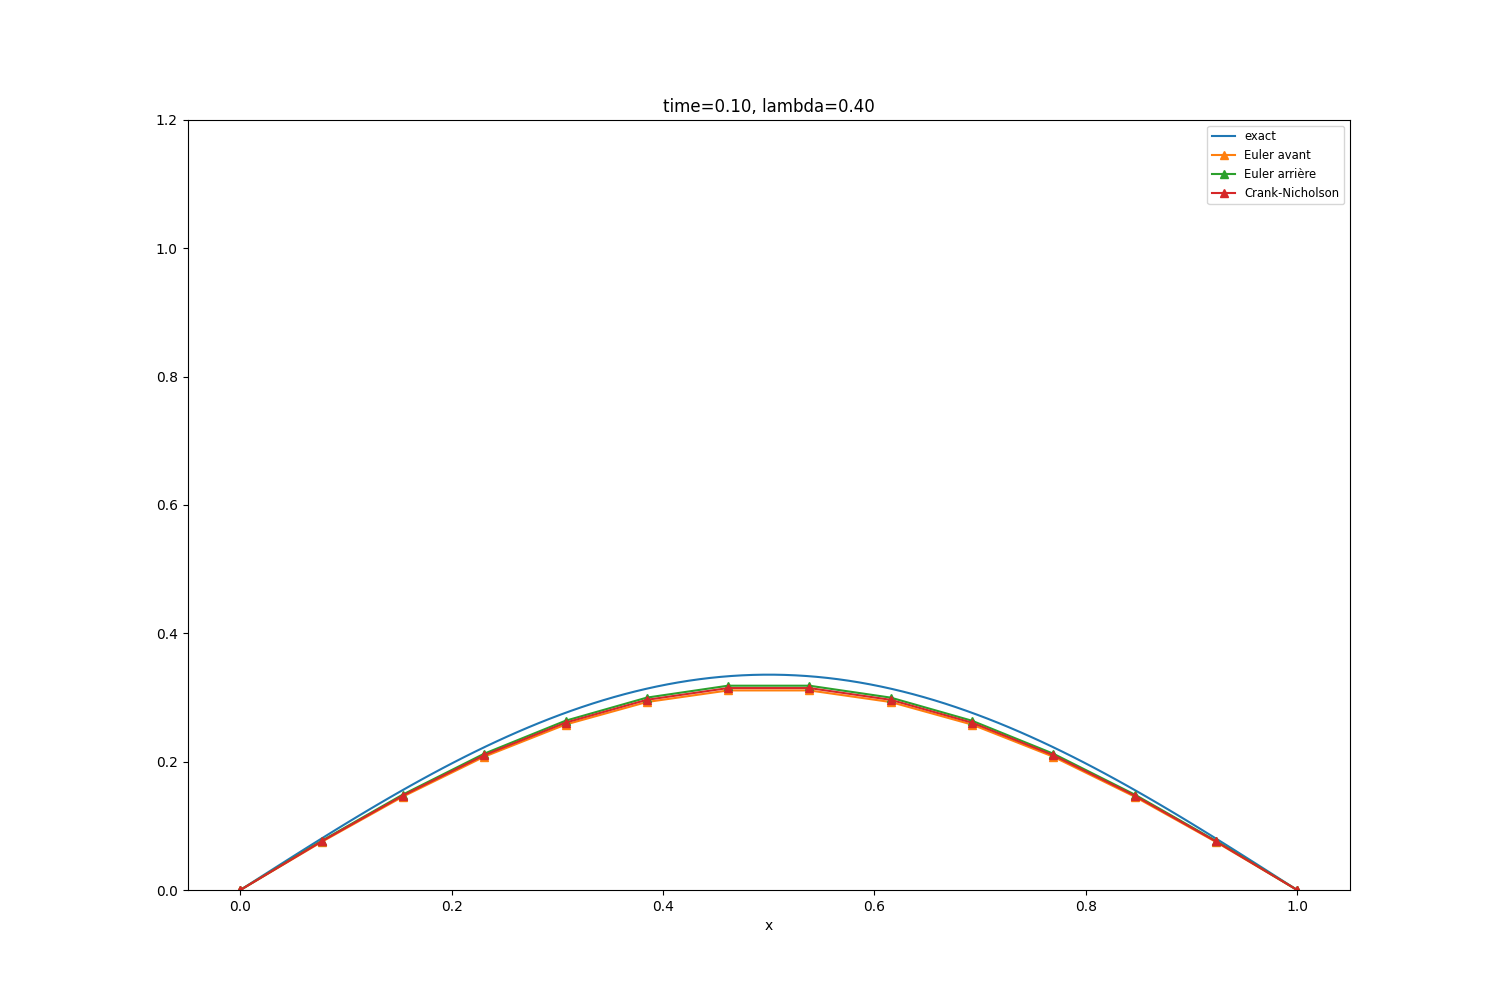

In [7]:
M=t.shape[0]


fig,ax=plt.subplots(figsize=(15,10))
ax.set_xlabel('x')
#ax[i].set_ylabel('u')
ax.set_ylim((0.,1.2))
ax.set_title('time=%.2f, lambda=%.2f'%(EAv_carre[2][0],EAv_carre[1]))

An_Sol,=ax.plot(xsol,Sol_carre[:,0],label='exact')
EAv,=ax.plot(x,EAv_carre[0][:,0],label='Euler avant',marker='^')
EAr,=ax.plot(x,EAr_carre[0][:,0],label='Euler arrière',marker='^')
CN,=ax.plot(x,CN_carre[0][:,0],label='Crank-Nicholson',marker='^')
ax.legend(loc='best',fontsize='small')


#def init():
#    An_Sol=ax.plot(xsol,Sol_carre[:,0],label='exact')
#    EAv=ax.plot(x,EAv_carre[0][:,0],label='Euler avant',marker='^')
#    EAr=ax.plot(x,EAr_carre[0][:,0],label='Euler arrière',marker='^')
#    CN=ax.plot(x,CN_carre[0][:,0],label='Crank-Nicholson',marker='^')

#    return An_Sol,EAv,EAr,CN

def update(i):
    An_Sol.set_data((xsol,Sol_carre[:,i]))
    EAv.set_data(x,EAv_carre[0][:,i])
    EAr.set_data(x,EAr_carre[0][:,i])
    CN.set_data(x,CN_carre[0][:,i])
    
    ax.set_title('time=%.2f, lambda=%.2f'%(EAv_carre[2][i],EAv_carre[1]))

    return An_Sol,EAv,EAr,CN

ani=FuncAnimation(fig, update, frames=M,  interval=(t[1]-t[0])*1000*100, repeat = False, blit=True)

plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

ani.save('dif_N12.mp4')

In [8]:
#Paramètres d'intégration numérique
N=80
x=np.linspace(0.,1.,N+2)
tmax=0.1
#Conditions frontières
bc=[0,0]
#Conditions initiales
a=1./4.
b=3./4.
U0_carre=square_Init(x,a,b,1)
U0_sinus=np.sin(2*np.pi*x)
lmb=0.4

EAv_carre=EulAvant(U0_carre,x,tmax,lmb,bc)
EAr_carre=EulArriere(U0_carre,x,tmax,lmb,bc)
CN_carre=CrNich(U0_carre,x,tmax,lmb,bc)

EAv_sinus=EulAvant(U0_sinus,x,tmax,lmb,bc)
EAr_sinus=EulArriere(U0_sinus,x,tmax,lmb,bc)
CN_sinus=CrNich(U0_sinus,x,tmax,lmb,bc)

#Solution analytique pour condition initiale carré et sinusoidal
t=EAv_carre[2]
xsol=np.linspace(0,1,100)
#xsol=x
Sol_carre=np.zeros((np.shape(xsol)[0],np.shape(t)[0]))
Sol_sinus=np.zeros((np.shape(xsol)[0],np.shape(t)[0]))
for i in range(np.shape(t)[0]):
    for p in range(1,1001):
        lambdap=float(p)*np.pi
        Ap=(2./(lambdap))*(np.cos(lambdap*a)-np.cos(lambdap*b))
        Sol_carre[:,i]+=Ap*np.exp(-lambdap**2*t[i])*np.sin(lambdap*xsol)
        Sol_sinus[:,i]=np.sin(2*np.pi*xsol)*np.exp(-(2*np.pi)**2*t[i])



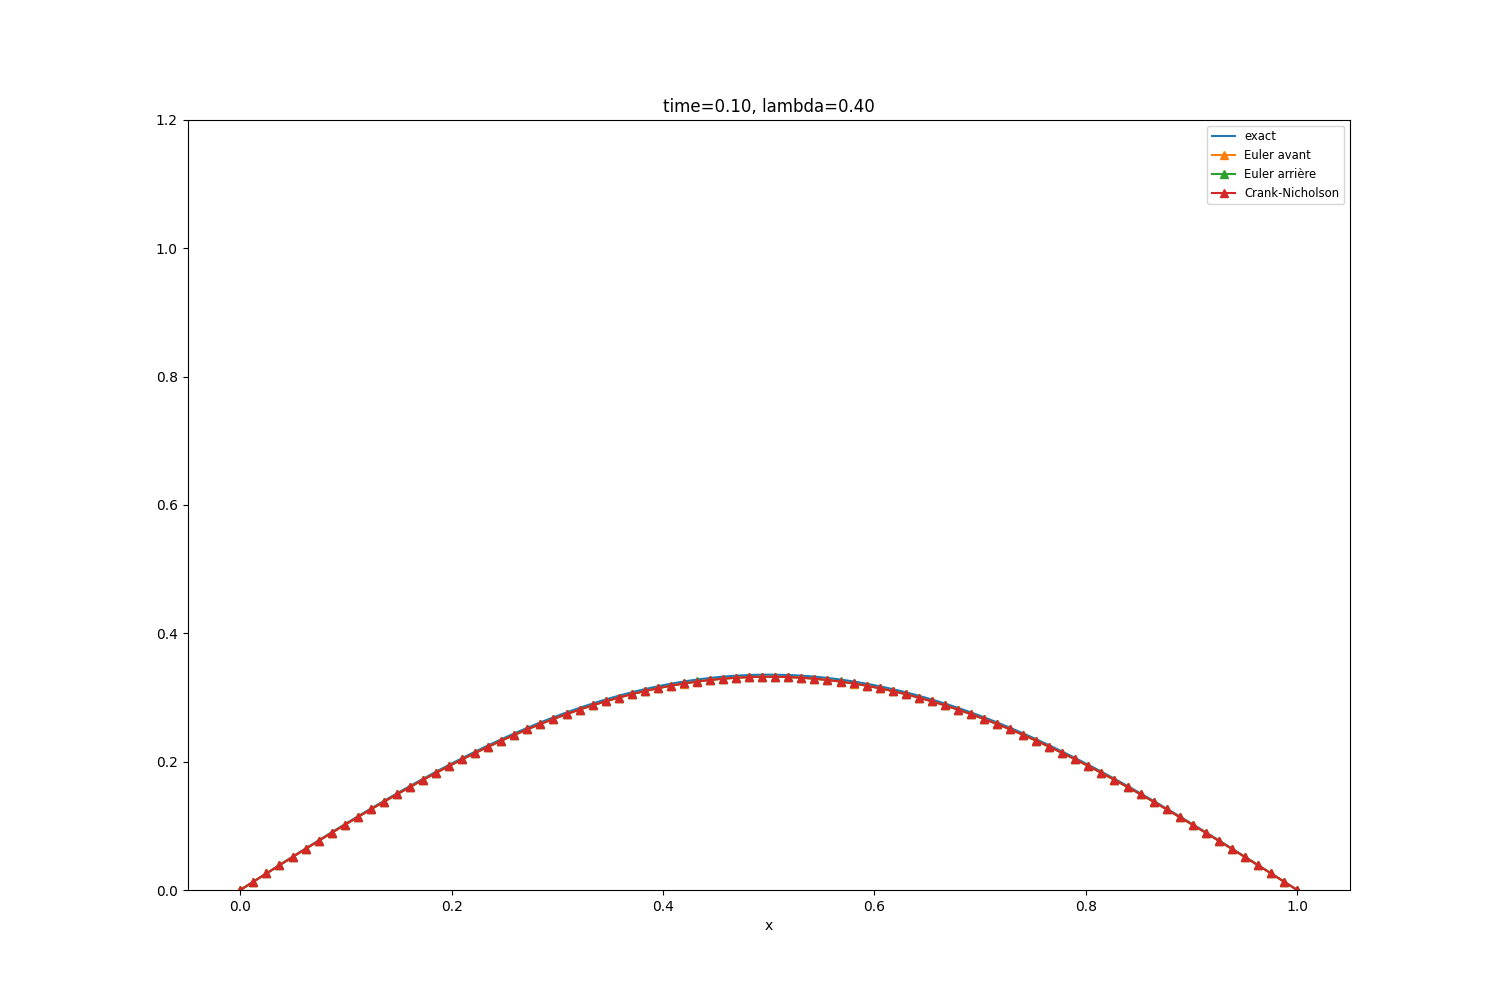

In [9]:
M=t.shape[0]


fig,ax=plt.subplots(figsize=(15,10))
ax.set_xlabel('x')
#ax[i].set_ylabel('u')
ax.set_ylim((0.,1.2))
ax.set_title('time=%.2f, lambda=%.2f'%(EAv_carre[2][0],EAv_carre[1]))

An_Sol,=ax.plot(xsol,Sol_carre[:,0],label='exact')
EAv,=ax.plot(x,EAv_carre[0][:,0],label='Euler avant',marker='^')
EAr,=ax.plot(x,EAr_carre[0][:,0],label='Euler arrière',marker='^')
CN,=ax.plot(x,CN_carre[0][:,0],label='Crank-Nicholson',marker='^')
ax.legend(loc='best',fontsize='small')


#def init():
#    An_Sol=ax.plot(xsol,Sol_carre[:,0],label='exact')
#    EAv=ax.plot(x,EAv_carre[0][:,0],label='Euler avant',marker='^')
#    EAr=ax.plot(x,EAr_carre[0][:,0],label='Euler arrière',marker='^')
#    CN=ax.plot(x,CN_carre[0][:,0],label='Crank-Nicholson',marker='^')

#    return An_Sol,EAv,EAr,CN

def update(i):
    An_Sol.set_data((xsol,Sol_carre[:,i]))
    EAv.set_data(x,EAv_carre[0][:,i])
    EAr.set_data(x,EAr_carre[0][:,i])
    CN.set_data(x,CN_carre[0][:,i])
    
    ax.set_title('time=%.2f, lambda=%.2f'%(EAv_carre[2][i],EAv_carre[1]))

    return An_Sol,EAv,EAr,CN

ani=FuncAnimation(fig, update, frames=M,  interval=(t[1]-t[0])*1000*100, repeat = False, blit=True)

plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

ani.save('dif_N80.mp4')

# Diffusion radioactive

${\large\frac{\partial u}{\partial t}=D \frac{\partial^{2}u}{\partial x^{2}}-bu}$, où $D$, $b$ sont des constantes positives, $u(0,t)=u(1,t)=0$ et $u(x,0)=g(x)$.

In [20]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

def Create_Init(x,x1,x2,yy):
    y=np.zeros(np.size(x))
    for i in range(np.size(x)):
        if x[i]>x1 and x[i]<x2:
            y[i]=yy
    return(y)

def tridiag(a,b,c,f):
    N=f.size
    x=np.zeros(N)
    cstar=np.zeros(N)
    astar=a[0]
    x[0]=f[0]/astar
    for k in range(1,N):
        cstar[k-1]=c[k-1]/astar
        astar=a[k]-b[k]*cstar[k-1]
        x[k]=(f[k]-b[k]*x[k-1])/astar
    for k in range(N-2,-1,-1):
        x[k]-=cstar[k]*x[k+1]
    return(x)



def EulArriere(U0,x,h,N,tmax,k,M,B,D,bc):
    t=np.linspace(0,tmax,M)
    U=np.zeros((np.shape(x)[0],np.shape(t)[0]))
    U[:,0]=U0
    lmb=D*k/h**2
    a=(1+2*lmb+B*k)*np.ones(N)
    b=-lmb*np.ones(N)
    c=-lmb*np.ones(N)
    for i in range(M-1):
        Uc = U[1:-1,i]
        U[1:-1,i+1]=tridiag(a,b,c,Uc)
        U[0,i+1]=bc[0]
    U[-1,i+1]=bc[1]
    return(U,t,lmb)

def CrNich(U0,x,h,N,T,k,M,B,D,bc):
    t=np.linspace(0,T,M)
    U=np.zeros((np.shape(x)[0],np.shape(t)[0]))
    U[:,0]=U0
    lmb=D*k/h**2
    B_u=np.diagflat(-lmb*np.ones(N-1),-1)+np.diagflat(-(2-2*lmb-B*k)*np.ones(N))+np.diagflat(-lmb*np.ones(N-1),1)
    a=-(2+2*lmb+B*k)*np.ones(N)
    b=lmb*np.ones(N)
    c=lmb*np.ones(N)
    for i in range(M-1):
        Uc = U[1:-1,i]
        U[1:-1,i+1]=tridiag(a,b,c,B_u.dot(Uc))
        U[0,i+1]=bc[0]
    U[-1,i+1]=bc[1]
    return(U,t,lmb)

def EulAvant(U0,x,h,N,T,k,M,B,D,bc):
    t=np.linspace(0,T,M)
    U=np.zeros((np.shape(x)[0],np.shape(t)[0]))
    U[:,0]=U0
    lmb=D*k/h**2
    A=np.diagflat(lmb*np.ones(N-1),-1)+np.diagflat(-(2*lmb+B*k)*np.ones(N))+np.diagflat(+lmb*np.ones(N-1),1)
    for i in range(M-1):
        Uc = U[1:-1,i]
        U[1:-1,i+1]=Uc+A@Uc
        U[0,i+1]=bc[0]
        U[-1,i+1]=bc[1]
    return(U,t,lmb)



In [21]:
#Paramètres du problème
L=1.
tmax=0.5
B=1
D=1

#Discrétisation temporelle
M=101
k=tmax/(M-1)

#Discrétisation spatiale
L=1
N=9
h=L/(N+1)
x=np.linspace(0,1,N+2)

#Condition initiale et frontières
U0=np.sin(np.pi*x)
bc=[0,0]




EAv=EulAvant(U0,x,h,N,tmax,k,M,B,D,bc)
EAr=EulArriere(U0,x,h,N,tmax,k,M,B,D,bc)
CN=CrNich(U0,x,h,N,tmax,k,M,B,D,bc)

t=EAv[1]
#Solution analytique
xsol=np.linspace(0,1,10000)
Sol=np.zeros((10000,np.shape(t)[0]))
for i in range(np.shape(t)[0]):	
    Sol[:,i]=np.sin(np.pi*xsol)*np.exp((-(B+(np.pi)**2*D)*t[i]))



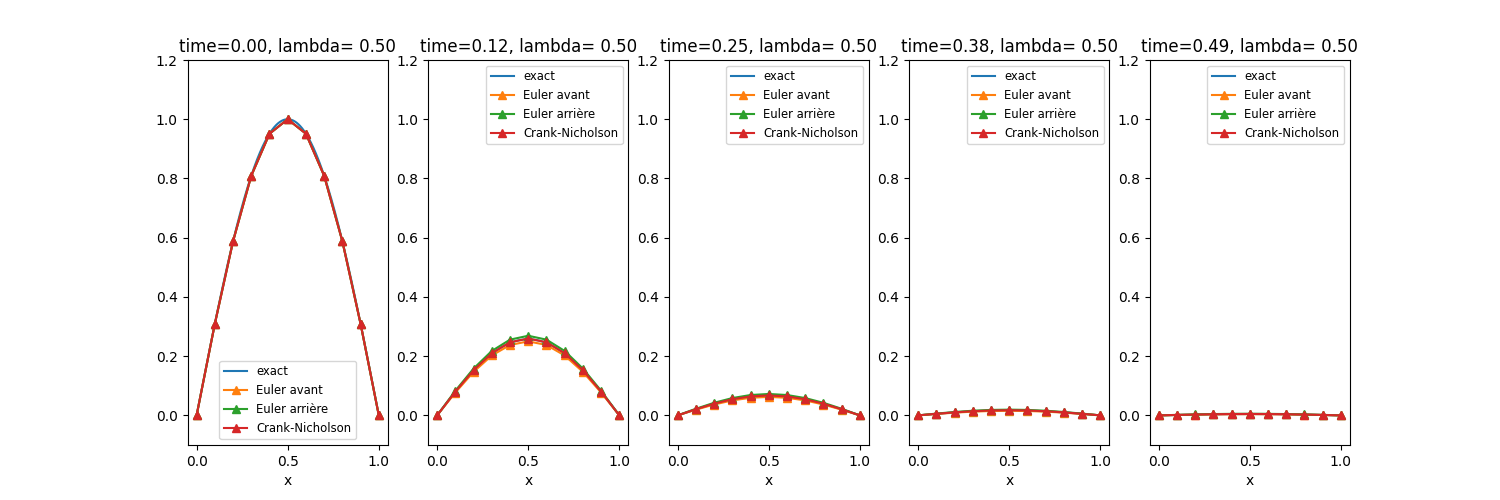

In [22]:
M=t.shape[0]
Mspan=[0,0.25,0.5,0.75,0.99]
fig,ax=plt.subplots(1,5,figsize=(15,5))
for i in range(len(Mspan)):
    n=int(np.floor(M*Mspan[i]))
    ax[i].plot(xsol,Sol[:,n],label='exact')
    ax[i].plot(x,EAv[0][:,n],label='Euler avant',marker='^')
    ax[i].plot(x,EAr[0][:,n],label='Euler arrière',marker='^')
    ax[i].plot(x,CN[0][:,n],label='Crank-Nicholson',marker='^')
    ax[i].legend(loc='best',fontsize='small')
    ax[i].set_xlabel('x')
    #ax[i].set_ylabel('u')
    ax[i].set_ylim((-0.1,1.2))
    ax[i].set_title('time=%.2f, lambda= %.2f'%(EAv[1][n],EAv[2]))
